In [1]:
#Sensitivity vs Specificity Graph
import nbimporter
from ms_functions import *
%run ms_functions.ipynb

Importing Jupyter notebook from ms_functions.ipynb


In [15]:
def ROC_plot(msdata, neg_col, technical_replicates, rep_name):
    
    samples = by_sample(msdata, technical_replicates)
    neg_cont = msdata.iloc[:,neg_col]
    neg_cont = np.array(neg_cont)

    sample = np.array(samples[rep_name].values.flatten())

    all_data = np.concatenate((neg_cont, sample))
    all_data = np.unique(all_data)
    all_data.sort()
    all_data = all_data[::-1]
    
    points = {}
    total = len(all_data)
    for t in all_data:
        x = len([i for i in neg_cont if i > t])# / len((neg_cont))
        y = len([i for i in sample if i > t]) #/ len(skipZero(sample))
        points[y] = x
    return points


In [16]:
def ROC_all(data, neg_col, cols=list(range(0,10)), boost=None):
    if boost!=None:
        p = ROC_plot(data, neg_col, {'a':[boost]}, 'a')
        plt.plot(p.values(), p.keys())
    for i in cols:
        if i != neg_col and i != boost:
            p = ROC_plot(data, neg_col, {'a':[i]}, 'a')
            plt.plot(p.values(), p.keys())

In [17]:
file = "data/proteinGroups_MS3_simplified.txt"
data = readin(file)

file = "data/proteinGroups_Slavov_FP94AA_simplified.txt"
Slavov2_data = readin(file)

In [22]:
technical_replicates = {"Line 1":[3]}#,5,6,7,8,9]}
Slavov2 = ROC_plot(Slavov2_data, 4, technical_replicates, "Line 1")

In [23]:
technical_replicates = {"Line 1":[0]}#,1,2,3,4,5,6,8]}
Kelly = ROC_plot(data, 7, technical_replicates, "Line 1")

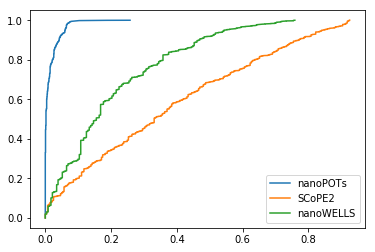

In [30]:
plt.plot(Kelly.values(), Kelly.keys(), label="nanoPOTs")
#plt.plot(Slavov2.values(), Slavov2.keys(), label="SCoPE2")
plt.plot(p3.values(), p3.keys(), label="nanoWELLS")
plt.legend(loc='lower right')
plt.show()

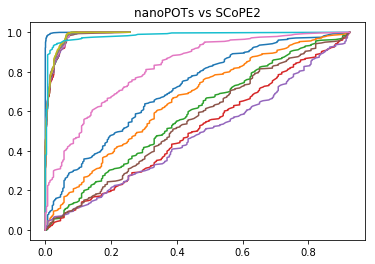

In [14]:
#plt.title('nanoPOTs vs SCoPE2')
ROC_all(data, 7, boost=9)
ROC_all(Slavov2_data, 4, cols=[1,3,5,6,7,8,9], boost=0)
plt.show()

In [6]:
file = "data/proteinGroups_boost50ng_run1_simplified.txt"
data50_1 = readin(file)

In [8]:
file = "data/proteinGroups_boost0_run2_simplified.txt"
data0_2 = readin(file)

In [9]:
file = "data/proteinGroups_boost0ng_run3_simplified.txt"
data0_3 = readin(file)

In [24]:
technical_replicates = {"Line 1":[0]}#,1,2,3,4,5,6,8]}
p3 = ROC_plot(data0_3, 9, technical_replicates, "Line 1")
p2 = ROC_plot(data0_2, 9, technical_replicates, "Line 1")

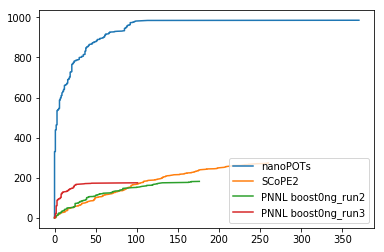

In [25]:
#plt.title('nanoPOTs vs SCoPE2')
plt.plot(Kelly.values(), Kelly.keys(), label="nanoPOTs")
plt.plot(Slavov2.values(), Slavov2.keys(), label="SCoPE2")
plt.plot(p2.values(), p2.keys(), label="PNNL boost0ng_run2")
plt.plot(p3.values(), p3.keys(), label="PNNL boost0ng_run3")
plt.legend(loc='lower right')
plt.show()

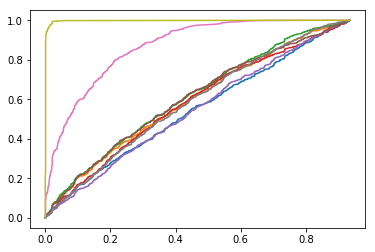

In [7]:
ROC_all(data_3, 3)

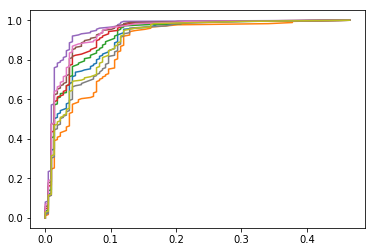

In [14]:
ROC_all(data0_3, 9)